In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 📊 Visual Analysis of Real-World Stock Market Data using Yahoo Finance API (Python)

## 📌 Project Overview

This project focuses on **visual exploration and analysis** of real-world
stock market data collected through an **API-based approach**.

Using the Yahoo Finance API (via the `yfinance` library), we extract historical
stock prices, trading volume, and dividend information, and visualize key
patterns and trends using Python.




## 📡 Data Source

- **Source**: Yahoo Finance
- **Access Method**: API (using `yfinance`)
- **Data Type**: Time-series stock market data
- **Frequency**: Daily
- **Stocks Analyzed**: Apple (AAPL), AMD


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


## Create API Function

In [3]:
def get_stock_data(ticker, period="max"):
    """
    Fetch stock data from Yahoo Finance API.

    Parameters:
    ticker (str): Stock symbol (e.g., 'AAPL', 'AMD')
    period (str): Time period for historical data

    Returns:
    price_df (DataFrame): Historical stock prices
    info_dict (dict): Company information
    dividends (Series): Dividend history
    """
    
    stock = yf.Ticker(ticker)
    price = stock.history(period=period)
    info = stock.info
    dividends = stock.dividends
    return price, info, dividends


## Extract Apple (AAPL) Data

In [4]:
apple_price, apple_info, apple_div = get_stock_data("AAPL")

apple_price.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098389,0.098817,0.098389,0.098389,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093684,0.093684,0.093256,0.093256,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086839,0.086839,0.086412,0.086412,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088550,0.088978,0.088550,0.088550,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091118,0.091545,0.091118,0.091118,73449600,0.0,0.0


## Data Understanding

In [5]:
apple_price.info()
apple_price.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11351 entries, 1980-12-12 00:00:00-05:00 to 2025-12-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          11351 non-null  float64
 1   High          11351 non-null  float64
 2   Low           11351 non-null  float64
 3   Close         11351 non-null  float64
 4   Volume        11351 non-null  int64  
 5   Dividends     11351 non-null  float64
 6   Stock Splits  11351 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 709.4 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,11351.000000,11351.000000,11351.000000,11351.000000,1.135100e+04,11351.000000,11351.000000
mean,27.856105,28.158440,27.572868,27.878813,3.098319e+08,0.000864,0.001498
std,57.590909,58.211029,57.025262,57.648113,3.334212e+08,0.012963,0.082352
min,0.038072,0.038072,0.037645,0.037645,0.000000e+00,0.000000,0.000000
25%,0.245770,0.252168,0.240320,0.245552,1.063608e+08,0.000000,0.000000
50%,0.479107,0.490503,0.468610,0.481518,1.989576e+08,0.000000,0.000000
75%,21.435403,21.686564,21.217228,21.474969,3.902570e+08,0.000000,0.000000
max,286.200012,288.619995,283.299988,286.190002,7.421641e+09,0.260000,7.000000


## Data Cleaning (Index Fix)

In [6]:
apple_price.reset_index(inplace=True)


# Visualization 1: Price Trend

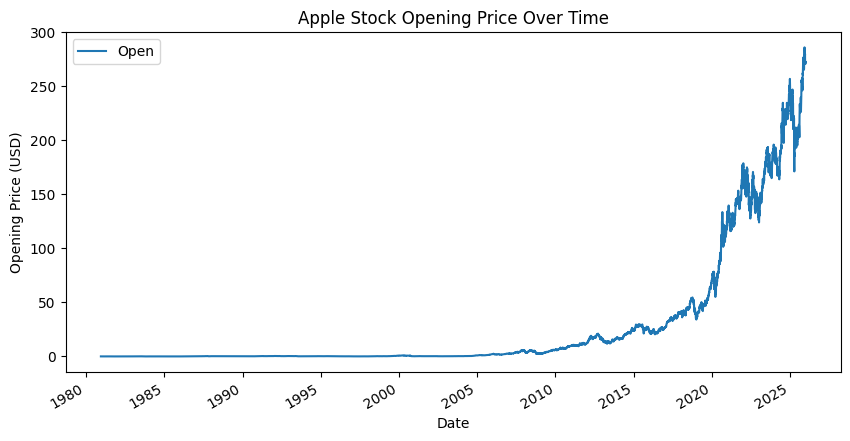

In [7]:
apple_price.plot(x="Date", y="Open", figsize=(10,5))
plt.title("Apple Stock Opening Price Over Time")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.show()


# Visualization 2: Trading Volume

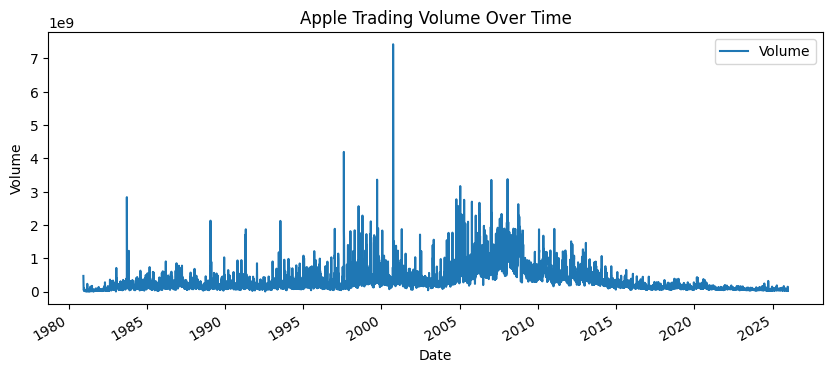

In [8]:
apple_price.plot(x="Date", y="Volume", figsize=(10,4))
plt.title("Apple Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


# Visualization 3: Dividend History

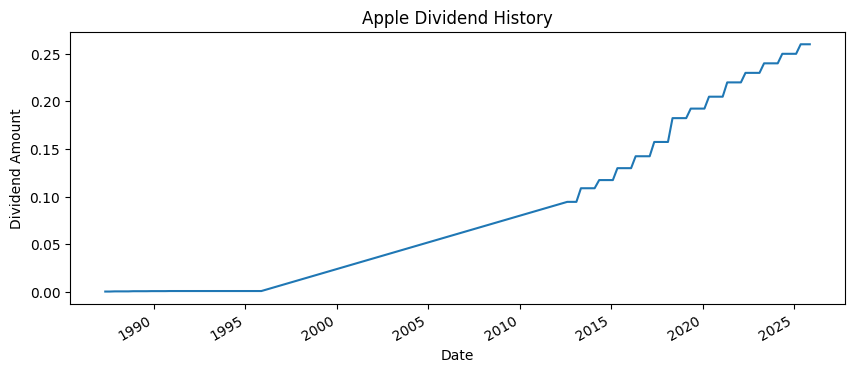

In [9]:
apple_div.plot(figsize=(10,4))
plt.title("Apple Dividend History")
plt.xlabel("Date")
plt.ylabel("Dividend Amount")
plt.show()


## Add Second Stock (AMD) for Comparison

In [10]:
amd_price, amd_info, amd_div = get_stock_data("AMD")
amd_price.reset_index(inplace=True)


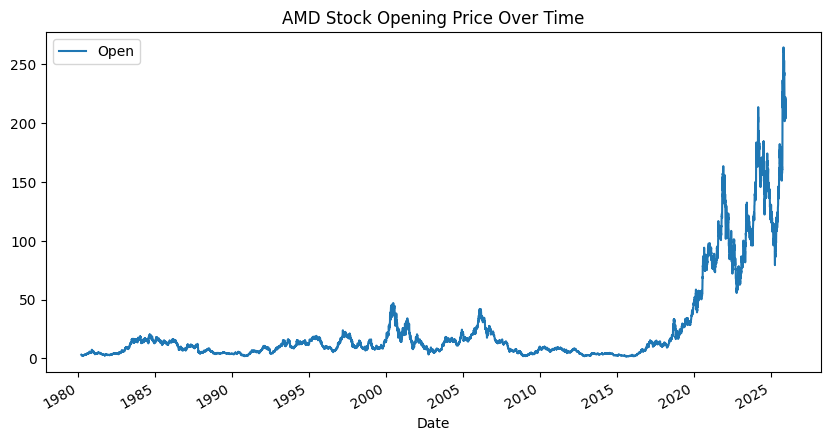

In [11]:
amd_price.plot(x="Date", y="Open", figsize=(10,5))
plt.title("AMD Stock Opening Price Over Time")
plt.show()


## 🔍 Key Insights

- Apple stock shows strong long-term growth since its IPO.
- Trading volume was significantly higher during early market periods.
- Dividend payments increased gradually, indicating financial stability.
- AMD shows higher volatility compared to Apple.


## ✅ Conclusion

This project demonstrates how **API-based data extraction** can be combined
with **data visualization** to analyze real-world financial data.
The approach is scalable and can be extended to additional stocks or markets.


# Style & Annotations

### Improve style (baseline)

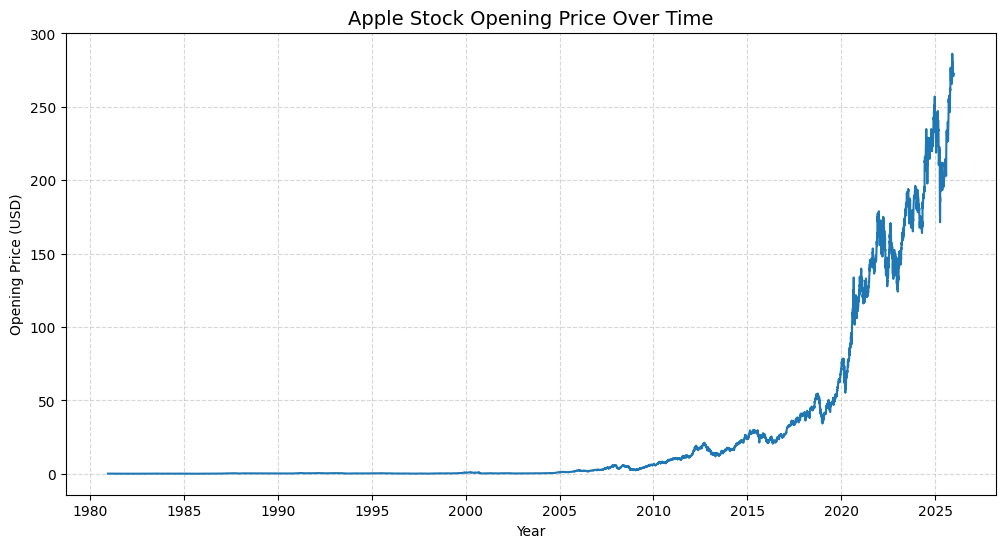

In [12]:
plt.figure(figsize=(12,6))
plt.plot(apple_price['Date'], apple_price['Open'])

plt.title("Apple Stock Opening Price Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Opening Price (USD)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Highlight Apple IPO Date

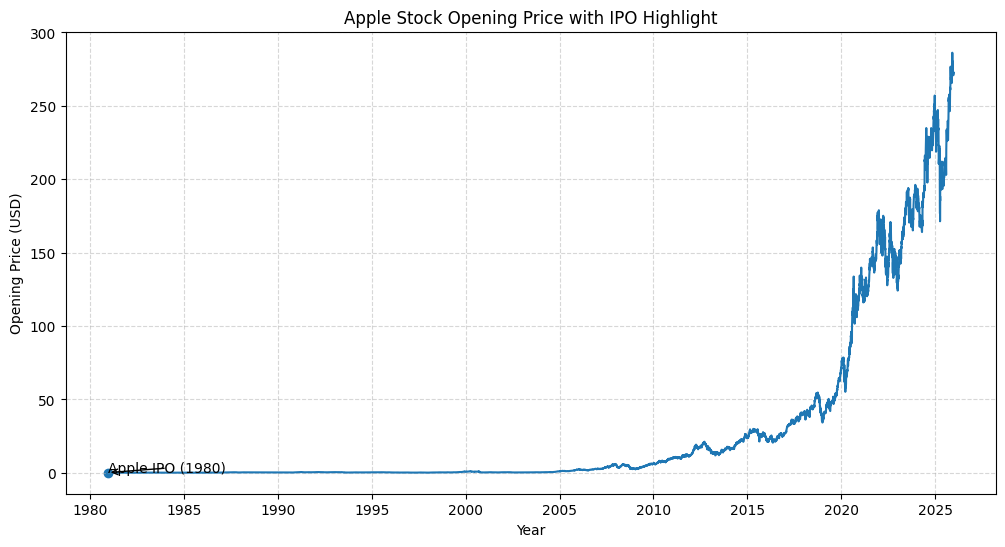

In [13]:
ipo_date = apple_price['Date'].iloc[0]
ipo_price = apple_price['Open'].iloc[0]

plt.figure(figsize=(12,6))
plt.plot(apple_price['Date'], apple_price['Open'])

plt.scatter(ipo_date, ipo_price)  # IPO point

plt.annotate(
    "Apple IPO (1980)",
    xy=(ipo_date, ipo_price),
    xytext=(ipo_date, ipo_price * 5),
    arrowprops=dict(arrowstyle="->")
)

plt.title("Apple Stock Opening Price with IPO Highlight")
plt.xlabel("Year")
plt.ylabel("Opening Price (USD)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Moving Average (Visual smoothing)

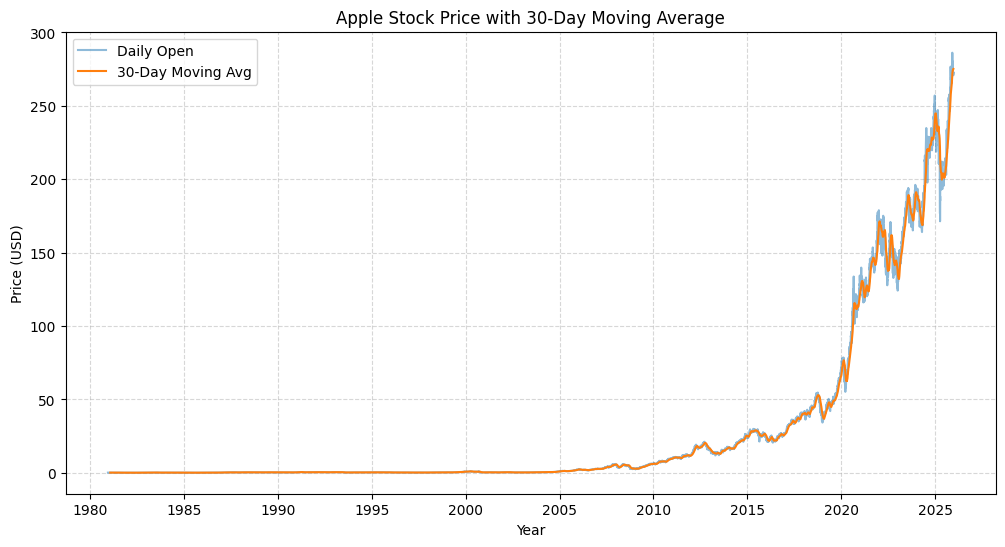

In [14]:
apple_price['MA_30'] = apple_price['Open'].rolling(30).mean()

plt.figure(figsize=(12,6))
plt.plot(apple_price['Date'], apple_price['Open'], label='Daily Open', alpha=0.5)
plt.plot(apple_price['Date'], apple_price['MA_30'], label='30-Day Moving Avg')

plt.title("Apple Stock Price with 30-Day Moving Average")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


# APPLE vs AMD COMPARISON CHARTS

### Prepare AMD data

In [15]:
amd_price.reset_index(inplace=True)


## Price comparison (Same chart)

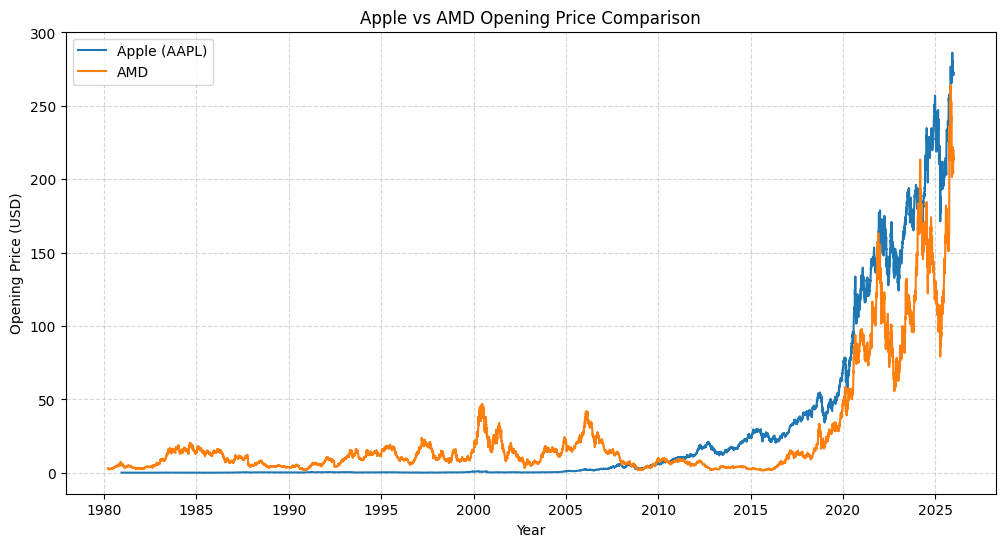

In [16]:
plt.figure(figsize=(12,6))

plt.plot(apple_price['Date'], apple_price['Open'], label='Apple (AAPL)')
plt.plot(amd_price['Date'], amd_price['Open'], label='AMD')

plt.title("Apple vs AMD Opening Price Comparison")
plt.xlabel("Year")
plt.ylabel("Opening Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


## Normalized comparison

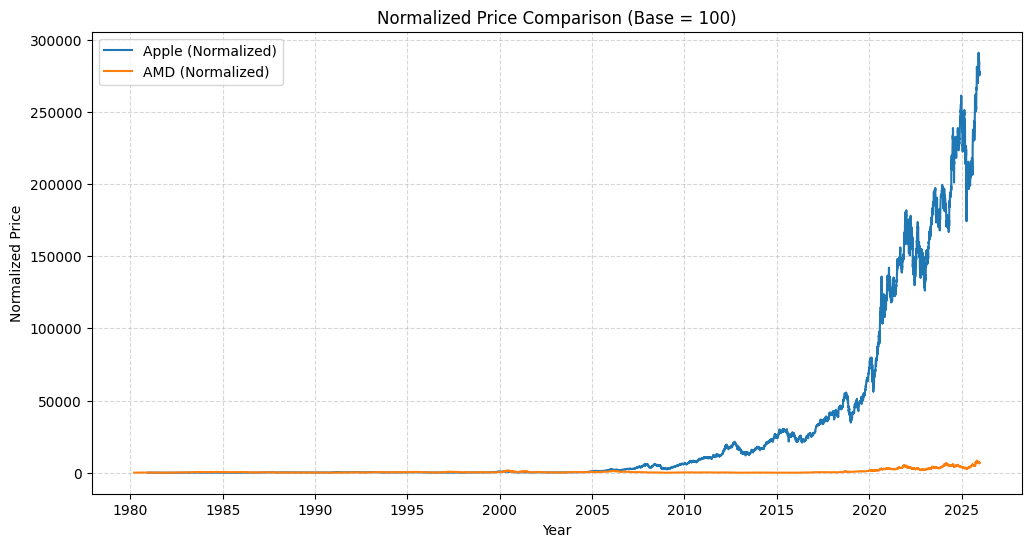

In [17]:
apple_norm = apple_price['Open'] / apple_price['Open'].iloc[0] * 100
amd_norm = amd_price['Open'] / amd_price['Open'].iloc[0] * 100

plt.figure(figsize=(12,6))
plt.plot(apple_price['Date'], apple_norm, label='Apple (Normalized)')
plt.plot(amd_price['Date'], amd_norm, label='AMD (Normalized)')

plt.title("Normalized Price Comparison (Base = 100)")
plt.xlabel("Year")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


## Volume comparison

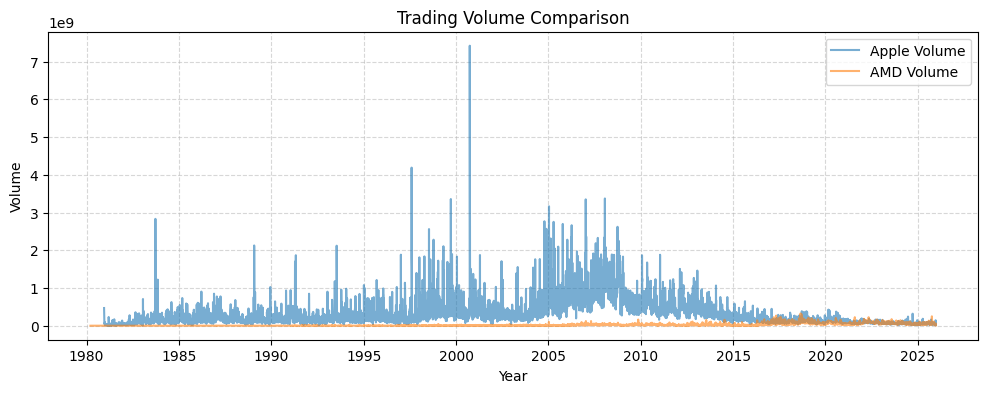

In [18]:
plt.figure(figsize=(12,4))
plt.plot(apple_price['Date'], apple_price['Volume'], label='Apple Volume', alpha=0.6)
plt.plot(amd_price['Date'], amd_price['Volume'], label='AMD Volume', alpha=0.6)

plt.title("Trading Volume Comparison")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


## 🔍 Key Visual Insights

### 📈 Long-Term Price Trend (Apple)
- Apple stock shows a **strong and consistent upward trend** from its IPO in 1980 to the present.
- Despite short-term fluctuations, the long-term trajectory indicates **sustained company growth and investor confidence**.
- The highlighted IPO point visually emphasizes how significantly the stock value has increased over decades.

---

### 🧮 Moving Average Analysis
- The 30-day moving average smooths daily price fluctuations and reveals the **underlying trend** more clearly.
- Periods where the daily price deviates strongly from the moving average indicate **higher volatility**.
- Overall, Apple demonstrates a **stable long-term trend** compared to short-term noise.

---

### 📊 Trading Volume Patterns
- Trading volume was notably higher during early market periods and major market events.
- Spikes in volume often correspond to **increased market activity**, such as earnings announcements or broader market movements.
- Over time, volume stabilizes, reflecting Apple’s maturity as a publicly traded company.

---

### 💰 Dividend History
- Apple’s dividend payments show a **gradual and consistent increase over time**.
- This trend suggests **strong cash flow and financial stability**, making Apple attractive to long-term investors.
- Dividend visualization complements price analysis by highlighting **shareholder returns beyond price appreciation**.

---

### ⚖️ Apple vs AMD – Price Comparison
- Apple exhibits **smoother and more stable growth**, while AMD shows **higher volatility**.
- AMD’s price movements reflect its sensitivity to market cycles and technology sector competition.
- Apple’s stability aligns with its position as a large, established technology company.

---

### 📉 Normalized Price Comparison (Base = 100)
- Normalizing prices allows for a **fair performance comparison** between Apple and AMD.
- Apple demonstrates **steady compounding growth**, while AMD shows sharper rises and falls.
- This highlights the difference between **growth stability (Apple)** and **higher-risk, higher-volatility behavior (AMD)**.

---

## 🧠 Overall Insight
This visualization-driven analysis demonstrates how **API-based real-world financial data**
can be transformed into meaningful insights using data visualization techniques.
By focusing on trends, comparisons, and key events, we gain a clearer understanding
of stock behavior without relying on predictive models.


## ✅ Project Summary

This project demonstrates a complete **data visualization workflow**
using real-world stock market data collected via an API.
The analysis highlights how visualization alone can uncover
valuable financial insights and support data-driven decision making.
